In [ ]:
import os
os.chdir("../")
from ml.feature.train_test_split import iterate_dir
from ml.feature.transform_to_csv import xml_to_csv
from ml.feature.dataset_with_bb import create_dataset

from google.cloud import storage



In [ ]:
client = storage.Client()

In [ ]:
# Example to create train and test split
# iterate_dir(source='gs://license-plate-workarea/data', 
#             dest='gs://license-plate-workarea/data', 
#             ratio=0.1, 
#             copy_xml=True, 
#             gcs=True)

In [ ]:
# Example to create xml to csv
# df = xml_to_csv(path='gs://license-plate-workarea/data/train',
# gcs=True)
# df.filename.to_list()
# python ml/feature/transform_to_csv.py --xml_dir=gs://license-plate-workarea/data/train --gcs=True
# python ml/feature/transform_to_csv.py --xml_dir=gs://license-plate-workarea/data/test --gcs=True

In [ ]:
# Example to to create bounding box csv
# df = create_dataset(path='gs://license-plate-workarea/data',
# gcs=True)
# df.head()

In [ ]:
# df.to_csv("gs://license-plate-workarea/data/test.csv")

In [ ]:
pip install --upgrade google-cloud-automl

In [32]:
# import sys

# from google.cloud import automl_v1beta1
# # from google.cloud.automl_v1beta1.proto import service_pb2


# # 'content' is base-64-encoded image data.
# def get_prediction(content, project_id, model_id):
#     prediction_client = automl_v1beta1.PredictionServiceClient()

#     name = 'projects/{}/locations/us-central1/models/{}'.format(project_id, model_id)
#     payload = {'image': {'image_bytes': content }}
#     params = {}
#     request = prediction_client.predict(name, payload, params)
#     return request  # waits till request is returned

# if __name__ == '__main__':
# #     file_path = sys.argv[1]
# #     project_id = sys.argv[2]
# #     model_id = sys.argv[3]

#     file_path = 'license_car.jpg'
#     project_id = "qwiklabs-gcp-04-5e7d5c24e704"
#     model_id = "IOD4232158793774923776"
    
#     with open(file_path, 'rb') as ff:
#         content = ff.read()

#     get_prediction(content, project_id, model_id)


from google.cloud import automl
import cv2
import matplotlib.pyplot as plt
import base64


# TODO(developer): Uncomment and set the following variables
project_id = "qwiklabs-gcp-04-5e7d5c24e704"
model_id = "IOD4232158793774923776"
file_path = "license_car.jpg"

prediction_client = automl.PredictionServiceClient()

# Get the full path of the model.
model_full_id = automl.AutoMlClient.model_path(project_id, "us-central1", model_id)

# Read the file.
with open(file_path, "rb") as content_file:
    content = content_file.read()

image = automl.Image(image_bytes=content)
payload = automl.ExamplePayload(image=image)

# params is additional domain-specific parameters.
# score_threshold is used to filter the result
# https://cloud.google.com/automl/docs/reference/rpc/google.cloud.automl.v1#predictrequest
params = {"score_threshold": "0.8"}

request = automl.PredictRequest(name=model_full_id, payload=payload, params=params)
response = prediction_client.predict(request=request)

# print("Prediction results:")
# for result in response.payload:
#     print (result)
#     print("Predicted class name: {}".format(result.display_name))
#     print("Predicted class score: {}".format(result.classification.score))
 
# read image
img = cv2.imread('license_car.jpg')
 
# height, width, number of channels in image
height = img.shape[0]
width = img.shape[1]

# print ("height: " + str(height))
# print ("width: " + str(width))


vertices = list(result.image_object_detection.bounding_box.normalized_vertices)
print (vertices)


[x: 0.3524951636791229
y: 0.5973330140113831
, x: 0.6731520295143127
y: 0.7241261601448059
]


In [26]:
x_min = int(vertices[0].x * width)
y_min = int(vertices[0].y * height)
x_max = int(vertices[1].x * width)
y_max = int(vertices[1].y * height)

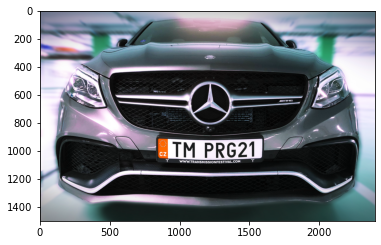

In [27]:
plt.imshow(img)

In [28]:
print (y_min)

895


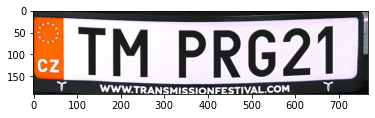

In [29]:
cropped = img[y_min:y_max, x_min:x_max]
plt.imshow(cropped)

In [30]:
from PIL import Image
im = Image.fromarray(cropped)
im.save("cropped.jpg")

In [31]:
import io
import os

# Imports the Google Cloud client library
from google.cloud import vision

# Instantiates a client
client = vision.ImageAnnotatorClient()

# The name of the image file to annotate
file_name = os.path.abspath('cropped.jpg')

# Loads the image into memory
with io.open(file_name, 'rb') as image_file:
    content = image_file.read()

image = vision.Image(content=content)

# Performs label detection on the image file
# response = client.label_detection(image=image)
# labels = response.label_annotations

print('Labels:')
# for label in labels:
#     print(label.description)
response = client.text_detection(image=image)
texts = response.text_annotations

print (str(texts[0].description).split("\n")[0])

Labels:
TM PRG21
